In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)

In [4]:
len(df.sum()[df.sum() >= 2])

787

In [5]:
df.shape

(5942, 1018)

In [6]:
conserved_patients = list(df.index)

In [7]:
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
#driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
driver_mutations = list(mutation_counts.mutation)
print len(driver_mutations)
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_types = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        df = df.ix[:, conserved_patients].dropna(axis=1)
        #df.set_index('mutation', inplace=True)
        values = get_values_from_df(df)
        value_types.append(values)
        print category, len(values)

plotting = pd.DataFrame({'category': ['Oncogenes' for x in value_types[0]] + ['TSgenes' for x in value_types[1]] + ['Random' for x in value_types[2]] + ['Germline' for x in value_types[3]] + ['Viral' for x in value_types[4]] + ['Bacterial' for x in value_types[5]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5]})


1018
oncogenes 3042304 643 512
tsgenes 2893754 602 487
random 17478000
germline 5826000
viral 5826000
bacterial 5826000


KeyboardInterrupt: 

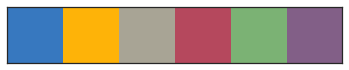

In [15]:
colors = ["windows blue", "amber", "greyish", "dark rose", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
plt.figure(figsize=(3.5, 3))
sns.violinplot(x='category', y='PHBR', data=plotting, order=['TSgenes', 'Oncogenes', 'Random', 'Germline', 'Viral', 'Bacterial'],
              palette=sns.xkcd_palette(colors))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('PHBR-II')
plt.ylim(-5, 105)
plt.tight_layout()
#plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.all_mutations.conservative.pdf')

In [8]:
print sp.mannwhitneyu(plotting[plotting.category == 'TSgenes'].PHBR, plotting[plotting.category == 'Oncogenes'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Oncogenes'].PHBR, plotting[plotting.category == 'Random'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Random'].PHBR, plotting[plotting.category == 'Germline'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Germline'].PHBR, plotting[plotting.category == 'Viral'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Viral'].PHBR, plotting[plotting.category == 'Bacterial'].PHBR)

MannwhitneyuResult(statistic=3801337354570.0, pvalue=0.0)
MannwhitneyuResult(statistic=26433098695138.5, pvalue=1.1277041285564257e-58)
MannwhitneyuResult(statistic=48485786383725.0, pvalue=0.0)
MannwhitneyuResult(statistic=14304113033446.5, pvalue=0.0)
MannwhitneyuResult(statistic=16544832980692.5, pvalue=0.0)


In [20]:
231738 + 190144 + (5942000*4)

24189882

In [7]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
#driver_mutations = list(mutation_counts.mutation)
print len(driver_mutations)
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_types = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, conserved_patients])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.csv'.format(category), index_col=0)
        df = df.ix[:, conserved_patients].dropna(axis=1)
        #df.set_index('mutation', inplace=True)
        values = get_values_from_df(df)
        value_types.append(values)
        print category, len(values)

plotting = pd.DataFrame({'category': ['Oncogenes' for x in value_types[0]] + ['TSgenes' for x in value_types[1]] + ['Random' for x in value_types[2]] + ['Germline' for x in value_types[3]] + ['Viral' for x in value_types[4]] + ['Bacterial' for x in value_types[5]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5]})


72
oncogenes 231738 643 39
tsgenes 190144 602 32
random 17478000
germline 5826000
viral 5826000
bacterial 5826000


KeyboardInterrupt: 

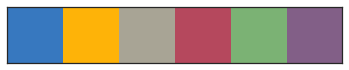

In [18]:
colors = ["windows blue", "amber", "greyish", "dark rose", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
plt.figure(figsize=(3.5, 3))
sns.violinplot(x='category', y='PHBR', data=plotting, order=['TSgenes', 'Oncogenes', 'Random', 'Germline', 'Viral', 'Bacterial'],
              palette=sns.xkcd_palette(colors))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('PHBR-II')
plt.ylim(-5, 105)
plt.tight_layout()
#plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.g10.conservative.pdf')

In [8]:
plotting.head()

,PHBR,category
0,31.155983,Oncogenes
1,28.255881,Oncogenes
2,35.682270,Oncogenes
3,24.251931,Oncogenes
4,41.664451,Oncogenes


In [ ]:
len(value_types[0]), len(pd.Series(value_types[0]).dropna())

In [12]:
for cat in ['TSgenes', 'Oncogenes', 'Random', 'Germline', 'Viral', 'Bacterial']:
    print cat, mean(plotting[plotting.category == cat].PHBR < 6)

TSgenes 0.0727323388203
Oncogenes 0.121413246105
Random 0.230647599451
Germline 0.222607270233
Viral 0.272259533608
Bacterial 0.286406858711


In [10]:
print sp.mannwhitneyu(plotting[plotting.category == 'Random'].PHBR, plotting[plotting.category == 'Germline'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Germline'].PHBR, plotting[plotting.category == 'Viral'].PHBR)

MannwhitneyuResult(statistic=48485786383725.0, pvalue=0.0)
MannwhitneyuResult(statistic=14304113033446.5, pvalue=0.0)


In [11]:
print sp.mannwhitneyu(plotting[plotting.category == 'Viral'].PHBR, plotting[plotting.category == 'Bacterial'].PHBR)

MannwhitneyuResult(statistic=16544832980692.5, pvalue=0.0)


Alternate population

In [9]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0)
mutation_counts = pd.DataFrame(df.sum()).reset_index()
mutation_counts.columns = ['mutation', 'count']
driver_mutations = list(mutation_counts[mutation_counts['count'] > 10].mutation)
#driver_mutations = list(mutation_counts.mutation)

In [10]:
categories = ['oncogenes', 'tsgenes', 'random', 'germline', 'viral', 'bacterial']
value_types = []
for category in categories:
    # restrict the columns to higher frequency mutations
    if category == 'oncogenes' or category == 'tsgenes':
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.alternate.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        app_restricted_space = [x for x in driver_mutations if x in df.index]
        values = get_values_from_df(df.ix[app_restricted_space, :])
        print category, len(values), len(df.index), len(app_restricted_space)
        value_types.append(values)
    else:
        df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/patient_matrices/{0}.all.alternate.csv'.format(category), index_col=0)
        #df.set_index('mutation', inplace=True)
        values = get_values_from_df(df)
        value_types.append(values)
        print category, len(values)

oncogenes 25389 643 39
tsgenes 20128 602 32
random 1887000
germline 629000
viral 629000
bacterial 629000


In [11]:
plotting = pd.DataFrame({'category': ['Oncogenes' for x in value_types[0]] + ['TSgenes' for x in value_types[1]] + 
                         ['Random' for x in value_types[2]] + ['Germline' for x in value_types[3]] + 
                         ['Viral' for x in value_types[4]] + ['Bacterial' for x in value_types[5]],
                         'PHBR': value_types[0] + value_types[1] + value_types[2] + value_types[3] + value_types[4] + value_types[5]})

In [12]:
print sp.mannwhitneyu(plotting[plotting.category == 'TSgenes'].PHBR, plotting[plotting.category == 'Oncogenes'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Oncogenes'].PHBR, plotting[plotting.category == 'Random'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Random'].PHBR, plotting[plotting.category == 'Germline'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Germline'].PHBR, plotting[plotting.category == 'Viral'].PHBR)
print sp.mannwhitneyu(plotting[plotting.category == 'Viral'].PHBR, plotting[plotting.category == 'Bacterial'].PHBR)

MannwhitneyuResult(statistic=186348358.5, pvalue=0.0)
MannwhitneyuResult(statistic=21038997726.5, pvalue=2.1015631964213929e-244)
MannwhitneyuResult(statistic=563946692083.5, pvalue=0.0)
MannwhitneyuResult(statistic=166522417486.0, pvalue=0.0)
MannwhitneyuResult(statistic=192392791285.5, pvalue=8.6770603530931373e-157)


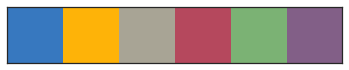

In [41]:
colors = ["windows blue", "amber", "greyish", "dark rose", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

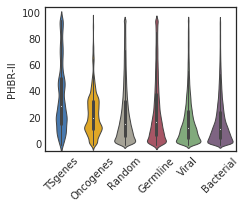

In [43]:
plt.figure(figsize=(3.5, 3))
sns.violinplot(x='category', y='PHBR', data=plotting, order=['TSgenes', 'Oncogenes', 'Random', 'Germline', 'Viral', 'Bacterial'],
              palette=sns.xkcd_palette(colors))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('PHBR-II')
plt.ylim(-5, 105)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.alternate.pdf')

Removed from manuscript

In [16]:
def threshold(x):
    if x < 10:
        return 1
    else:
        return 0
plotting['PHBR_Threshold'] = plotting.PHBR.apply(threshold)
plotting_thresholds = pd.DataFrame({'Recurrency': ['Oncogenes', 'TSgenes', 'Random', 'Germline', 'Viral', 'Bacterial'],
                                    'Fraction': [plotting[plotting.category  == 'Oncogenes'].PHBR_Threshold.mean(),
                                                 plotting[plotting.category  == 'TSgenes'].PHBR_Threshold.mean(),
                                                 plotting[plotting.category  == 'Random'].PHBR_Threshold.mean(),
                                                 plotting[plotting.category  == 'Germline'].PHBR_Threshold.mean(),
                                                plotting[plotting.category  == 'Viral'].PHBR_Threshold.mean(),
                                                 plotting[plotting.category  == 'Bacterial'].PHBR_Threshold.mean()]})
plt.figure(figsize=(2.5, 3))
sns.barplot(x='Recurrency', y='Fraction', data=plotting_thresholds, color='lightgrey',
           order=['TSgenes', 'Oncogenes', 'Random', 'Germline', 'Viral', 'Bacterial'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('')
plt.ylabel('Fraction of Mutations\nbelow 10 PHBR')
plt.locator_params(axis='y', nbins=5)
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/patient.threshold.all_mutations.pdf')